<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/ANN_Clasificaci%C3%B3n_Binaria_Detecci%C3%B3n_coraz%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Clasificación binaria

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
#Lectura datos históricos
df = pd.read_excel('./Heart_diagnosis.xlsx',sheet_name='heart')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3.Análisis de Datos (EDA) + Preprocesado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3.1 Limpieza inicial

In [6]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
df_var = df.isnull().sum() #Creamos una serie de pandas con el número de valores nulos de cada variable
porcentaje_eliminacion = 0.1 #10%
df_var = df_var[df_var<porcentaje_eliminacion*len(df)] #Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
lista_variables_OK = df_var.index #Nos quedamos con el índice de la serie (los nombres de las variables de interés)
df = df[lista_variables_OK] #Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Eliminamos registros que tienen algún valor erróneo (se podría interpolar)
df.dropna(inplace=True)
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 3.2 Visualización

### 3.2.1 Plots básicos

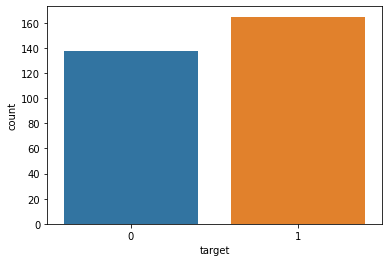

In [10]:
#Verificar si hay una proporción equilibrada entre "0" y "1" para un buen modelado posterior
sns.countplot(x='target',data=df)

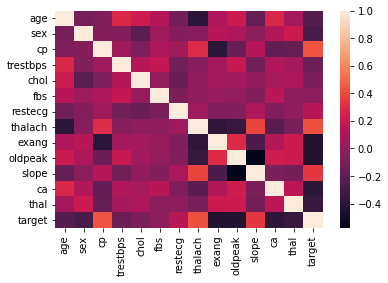

In [11]:
sns.heatmap(df.corr())

In [12]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

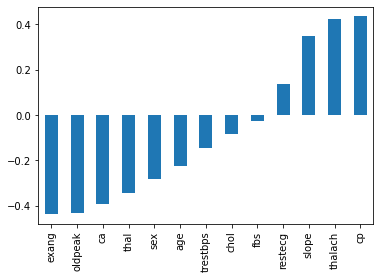

In [13]:
df.corr()['target'][:-1].sort_values().plot(kind='bar') #Quitamos la propia variable objetivo

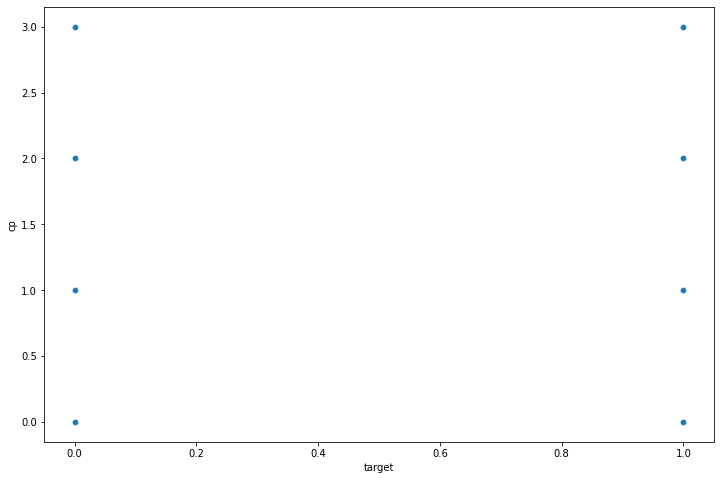

In [14]:
#Visualizar variables altamente correladas con la salida
plt.figure(figsize=(12,8))
sns.scatterplot(x='target',y='cp',data=df)

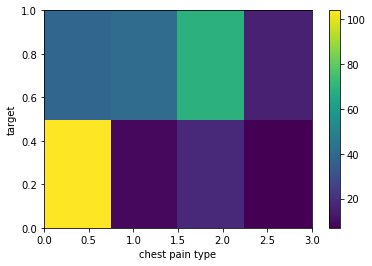

In [15]:
#Si los valores están normalizados, lo mejor es visualizar un histograma 2D
plt.hist2d(df["cp"],df["target"],bins=(4,2),cmap=plt.cm.viridis)
plt.xlabel('chest pain type')
plt.ylabel('target')
plt.colorbar()

### 3.2.2 Plot geográficos

In [ ]:
# Visualizar la información geográfica si estuviera completa, el ejemplo que hay a continuación proviende de una 
# fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='long',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='lat',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',data=df,hue='price') #Representación con poco rango dinámico de colores debido a los outliers
#len(df)*(0.01) #número de muestras que sería el 1% de nuestros datos
#non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #estaríamos quitando el 1% de valores outliers
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',
#                data=non_top_1_perc,hue='price',
#                palette='RdYlGn',edgecolor=None,alpha=0.2) 

### 3.2.3 Otras variables

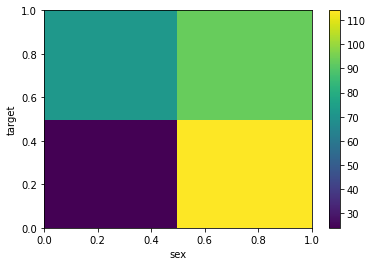

In [16]:
plt.hist2d(df["sex"],df["target"],bins=(2,2),cmap=plt.cm.viridis)
plt.xlabel('sex')
plt.ylabel('target')
plt.colorbar()

## 3.3 Limpieza final

In [ ]:
# Objetivo: Eliminar variables que no tienen ninguna relación con la variable objetivo (precio) 
# o bien su información ya está incluida en otras variables - Aprovechar conocimiento del campo que estamos tratando

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 43.6 KB


In [18]:
df.corr()['target'].sort_values() #Podríamos eliminar "fbs" = "fasting blood sugar > 120 mg/dl", correlación muy baja

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

### 3.3.2 Limpieza temporal

In [ ]:
#Importante visualizar la evolución temporal (si ha habido un importante cambio, quedarse con 
#la porción de datos que corresponde a la situación actual para mejorar la futura predicción)
#El ejemplo que hay a continuación proviende de una fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction

#df['date'] = pd.to_datetime(df['date'])

#df['month'] = df['date'].apply(lambda date:date.month)

#df['year'] = df['date'].apply(lambda date:date.year)

#sns.boxplot(x='year',y='price',data=df)

#sns.boxplot(x='month',y='price',data=df)

#df.groupby('month').mean()['price'].plot()

#df.groupby('year').mean()['price'].plot()

#df = df.drop('date',axis=1) #La fecha no será una variable útil para el modelo

#df['sqft_basement'].value_counts()

### 3.3.3 Transformación variables categóricas

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Utilizar OneHotEncoder si variables categóricas (se obtiene una columna por cada categoría asignando 0 o 1) / Las variables booleanas no es necesario convertirlas True = 1 / False = 0
#from sklearn.preprocessing import OneHotEncoder
#oe_style = OneHotEncoder()
#oe_results = oe_style.fit_transform(df[["body_style"]]) #body_style sería la variable categórica
#pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
#df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

# 4.Train Test Split

In [20]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [21]:
X.shape

(303, 13)

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [25]:
X_train.shape

(227, 13)

In [26]:
X_test.shape

(76, 13)

# 5.Escalado

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train.shape

(227, 13)

In [32]:
X_test.shape

(76, 13)

In [33]:
X_train

array([[0.79166667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.29166667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.35416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.33333333],
       [0.39583333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667]])

In [34]:
X_train.max()

1.0

# 6.Creación del modelo

    # Para un problema de clasificación binario
    model.compile(optimizer='rmsprop', # o "adam"
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [36]:
X_train.shape

(227, 13)

In [37]:
model = Sequential()
# Elegir número de capas (layers)
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
model.add(Dense(units=num_neuronas,activation='relu'))

model.add(Dense(units=np.round(num_neuronas/2),activation='relu'))

model.add(Dense(units=1,activation='sigmoid')) # Indicar tantas neuronas de salida como variables a predecir, en este caso solo 1 variable "target"

# Para clasificación binaria "binary_crossentropy"
model.compile(loss='binary_crossentropy', optimizer='adam')

# 7. Entrenamiento del modelo

### Ejemplo 1: Valor alto de epochs y overfitting

In [ ]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

In [39]:
model_loss = pd.DataFrame(model.history.history)

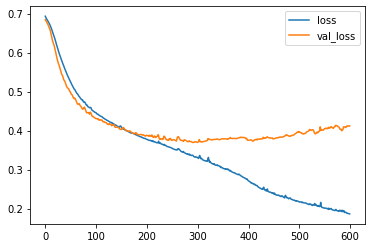

In [40]:
model_loss.plot()

### Ejemplo 2: Early Stopping

Aplicar early stopping para seguir a val_loss y parar en base a la condición indicada

In [41]:
model = Sequential()
model.add(Dense(units=num_neuronas,activation='relu'))
model.add(Dense(units=np.round(num_neuronas/2),activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

Parar el entrenamiento cuando un valor monitorizado (pérdidas) deja de mejorar:

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

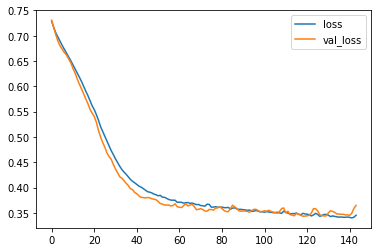

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Ejemplo 3: Añadir DropOut Layers
    #Solo algunas neuronas se actualizarán en cada epoch, permitiendo que solo se ajusten algunos pesos (w) y bias (b) en cada iteración de manera independiente (reduce overfitting)

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
model = Sequential()

model.add(Dense(units=num_neuronas,activation='relu'))
model.add(Dropout(0.5)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=np.round(num_neuronas/2),activation='relu'))
model.add(Dropout(0.5)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

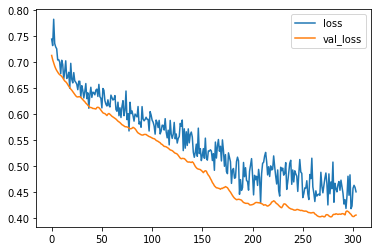

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 8. Evaluación del modelo

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

## 8.1 Predicción sobre el conjunto de Test

In [51]:
predictions = model.predict(X_test)

In [ ]:
np.where(predictions > 0.5, 1,0)

In [53]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,np.where(predictions > 0.5, 1,0)))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.84      0.82      0.83        39

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [54]:
print(confusion_matrix(y_test,np.where(predictions > 0.5, 1,0)))

[[31  6]
 [ 7 32]]


## 8.2 Predicción sobre nuevos datos

In [55]:
#Lectura datos a predecir
df_pred = pd.read_excel('./Heart_diagnosis.xlsx',sheet_name='Datos_Predecir')
df_pred = df_pred[df.columns] #Filtramos el dataframe predicción para quedarnos con las mismas columnas de interés que el df histórico
X_pred = df_pred.drop('target',axis=1) #Eliminamos la columna objetivo (vacía) si la hubiera en nuestro df con los datos a predecir
X_pred = scaler.transform(X_pred)
#Realizamos predicción
resultado = model.predict(X_pred)
#Unimos en un dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN']=pd.DataFrame(np.where(resultado > 0.5, 1,0))
df_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,PREDICCIÓN
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,NaN,1
1,42,1,2,130,250,0,1,187,0,3.5,0,0,2,NaN,0
2,40,0,1,130,204,0,0,172,0,1.4,2,0,2,NaN,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,NaN,1
4,62,0,0,120,354,0,1,163,1,0.6,2,0,2,NaN,1
5,58,1,0,140,192,0,1,148,0,0.4,1,0,1,NaN,1
6,55,0,1,140,294,0,0,153,0,1.3,1,0,2,NaN,1
7,34,1,1,120,263,0,1,173,0,0.0,2,0,3,NaN,1
8,50,1,2,172,199,1,1,162,0,0.5,2,0,3,NaN,1
9,59,1,2,150,168,0,1,174,0,1.6,2,0,2,NaN,1


In [ ]:
#Guardar y cargar el modelo para posterior uso
from tensorflow.keras.models import load_model
model.save('modelo_pred_heart.h5')